The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


T-test p-value: 0.78097
mean error gop integration: 0.0660023970130056
mean error net integration: 0.06562748715982226
mean error net motion: 0.09856296989980355
mean error net visual: 0.08335708807616894
mean error bayesian: 0.06364714036546856


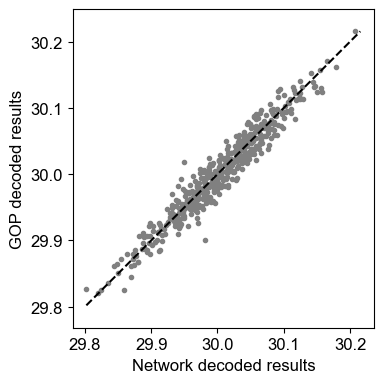

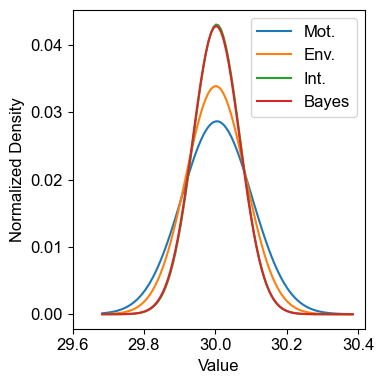

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from Network_bayesian import Place_net, Grid_net, Coupled_Net
import brainpy as bp
import brainpy.math as bm
from matplotlib.animation import FuncAnimation
import time
from scipy.stats import ttest_ind, norm

# 保存数据为npz文件
data = np.load('data/distribution_results.npz')
z_decode_gop = data['z_decode_gop']
z_decode_net = data['z_decode_net']
z_decode_net_motion = data['z_decode_net_motion']
z_decode_net_visual = data['z_decode_net_visual']

# 计算t-test结果并输出p值
t_stat, p_value = ttest_ind(z_decode_gop, z_decode_net)
print(f"T-test p-value: {p_value:.5f}")

# 设置字体
plt.rcParams.update({'font.size': 12, 'font.family': 'Arial'})

# 画图
plt.figure(figsize=(4, 4))
z_decode_all = np.concatenate([z_decode_gop, z_decode_net])
min_z = np.min(z_decode_all)
max_z = np.max(z_decode_all)

plt.plot(z_decode_net, z_decode_gop, '.', color='gray')
plt.xticks([29.8,29.9,30,30.1,30.2])
plt.yticks([29.8,29.9,30,30.1,30.2])
plt.plot([min_z, max_z], [min_z, max_z], 'k--')
plt.xlabel('Network decoded results')
plt.ylabel('GOP decoded results')
plt.axis('equal')  # 设置坐标轴比例相等
plt.tight_layout()
plt.savefig('figures/net_gop_comparison.eps')

z_truth= 30
error_int_net = np.abs(z_decode_net-z_truth)
error_mot_net = np.abs(z_decode_net_motion-z_truth)
error_vis_net = np.abs(z_decode_net_visual-z_truth)
error_int_gop = np.abs(z_decode_gop-z_truth)

# 保存数据为npz文件
np.savez('decode_results.npz', z_decode_net=z_decode_net, z_decode_net_motion=z_decode_net_motion, z_decode_gop=z_decode_gop, z_decode_net_visual=z_decode_net_visual)
z_decode_all = np.concatenate([z_decode_net, z_decode_net_motion, z_decode_net_visual, z_decode_gop])
min_z = np.min(z_decode_all)
max_z = np.max(z_decode_all)
# 设置字体
plt.rcParams.update({'font.size': 12, 'font.family': 'Arial'})

# 画图


# 绘制z_decode_gop的直方图及高斯拟合
xmin, xmax = min_z, max_z

def gaussian_fit(data, xmin, xmax):
    mu, std = norm.fit(data)
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    return x, p

x_int_gop, p_int_gop = gaussian_fit(z_decode_gop, xmin, xmax)
x_int_net, p_int_net = gaussian_fit(z_decode_net, xmin, xmax)
x_mot_net, p_mot_net = gaussian_fit(z_decode_net_motion, xmin, xmax)
x_vis_net, p_vis_net = gaussian_fit(z_decode_net_visual, xmin, xmax)


sigma_1 =np.std(z_decode_net_motion)
sigma_2 =np.std(z_decode_net_visual)
sigma_3 = np.sqrt(1/(1/sigma_1**2 + 1/sigma_2**2))
print('mean error gop integration:', np.std(z_decode_gop))
print('mean error net integration:', np.std(z_decode_net))
print('mean error net motion:', np.std(z_decode_net_motion))
print('mean error net visual:', np.std(z_decode_net_visual))
print('mean error bayesian:', sigma_3)



plt.figure(figsize=(4,4))
plt.plot(x_mot_net, p_mot_net/np.sum(p_int_net),label='Mot.')
plt.plot(x_vis_net, p_vis_net/np.sum(p_int_net),label='Env.')
plt.plot(x_int_net, p_int_net/np.sum(p_int_net),label='Int.')
plt.plot(x_int_gop, p_int_gop/np.sum(p_int_gop),label='Bayes')

plt.xticks([29.6,29.8,30,30.2,30.4])
# plt.axis('equal')  # 设置坐标轴比例相等
plt.xlabel('Value')
plt.ylabel('Normalized Density')
plt.legend()
plt.tight_layout()
plt.savefig('figures/normalized_density.eps')


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


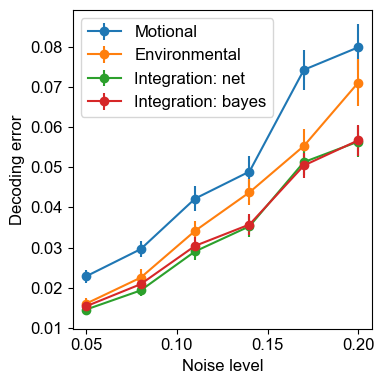

In [24]:

# 保存数据为npz文件
data = np.load('data/results.npz')
mean_integrate_net = data['mean_integrate_net']
mean_motion_net = data['mean_motion_net']
mean_visual_net = data['mean_visual_net']
mean_integrate_gop = data['mean_integrate_gop']
std_integrate_net = data['std_integrate_net']
std_motion_net = data['std_motion_net']
std_visual_net = data['std_visual_net']
std_integrate_gop = data['std_integrate_gop']

n_stre = 6
noise_stre = np.linspace(0.05, 0.2, n_stre)

plt.rcParams.update({'font.size': 12, 'font.family': 'Arial'})

# 画图
plt.figure(figsize=(4, 4))
plt.errorbar(noise_stre, mean_motion_net, yerr=std_motion_net/10, fmt='-o',label='Motional')
plt.errorbar(noise_stre, mean_visual_net, yerr=std_visual_net/10, fmt='-o',label='Environmental')
plt.errorbar(noise_stre, mean_integrate_net, yerr=std_integrate_net/10, fmt='-o',label='Integration: net')
plt.errorbar(noise_stre, mean_integrate_gop, yerr=std_integrate_gop/10, fmt='-o',label='Integration: bayes')
plt.xlabel('Noise level')
plt.ylabel('Decoding error')
plt.legend()


# plt.errorbar(noise_stre, mean_motion_net, yerr=std_motion_net, fmt='-o')
# plt.errorbar(noise_stre, mean_visual_net, yerr=std_visual_net, fmt='-o')
# plt.errorbar(noise_stre, mean_integrate_net, yerr=std_integrate_net, fmt='-o')
# plt.errorbar(noise_stre, mean_integrate_gop-30, yerr=std_integrate_gop, fmt='-o')

plt.tight_layout()
plt.savefig('figures/Bayesian_integration.eps')
plt.show()


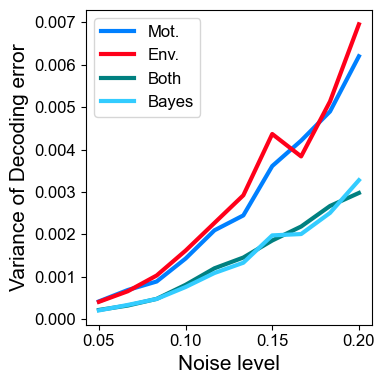

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
# 保存数据为npz文件
data = np.load('results.npz')
std_integrate_net = data['std_integrate_net']
std_motion_net = data['std_motion_net']
std_visual_net = data['std_visual_net']
std_integrate_gop = data['std_integrate_gop']
std_bayes = data['std_bayes']
n_stre = 10
noise_stre = np.linspace(0.05, 0.2, n_stre)
plt.figure(figsize=(4, 4))

plt.rcParams.update({'font.size': 12, 'font.family': 'Arial'})
mpl.rcParams['axes.labelsize'] = 15
plt.plot(noise_stre,std_motion_net**2,label='Mot.',color=[0.,0.5,1],linewidth=3)
plt.plot(noise_stre,std_visual_net**2,label='Env.',color=[1,0,0.1],linewidth=3)
plt.plot(noise_stre,std_integrate_net**2,label='Both',color=[0,0.5,0.5],linewidth=3)
plt.plot(noise_stre,std_bayes**2,label='Bayes',color=[0.2,0.8,1],linewidth=3)
plt.xlabel('Noise level')
plt.ylabel('Variance of Decoding error')
plt.legend()


plt.tight_layout()
plt.savefig('standard_deviation.pdf')

# plt.show()